<a href="https://colab.research.google.com/github/TanD18/Exploratory-Data-Analysis-on-Zomato-Data/blob/main/Variable_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dependencies/Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from warnings import filterwarnings
filterwarnings('ignore')

##Preprocessing

In [7]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: zomato.csv              


In [8]:
df=pd.read_csv('/content/zomato.csv')

#Removing string sequence ',' from approx_cost(for two people) column Eg: 1,000->1000
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

#Removing records with null value in the 'rate' and 'approx_cost(for two people)' columns
df.dropna(axis=0,subset=['rate'],inplace=True)
df.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)

def split_(x):
  return x.split('/')[0]
#Removing '/' from the 'rate' column value
df['rate']=df['rate'].apply(split_)

#Removing rows with garbage value in rate column
df.drop(axis=0,index=df.loc[df['rate'].isin(['NEW','-'])].index,inplace=True)

#Converting Rate column value from string to float type
df['rate']=df['rate'].astype('float')

#Converting approx_cost column value from string to float type
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float')

#Variable Analysis

##Vote vs Rating Analysis

Text(0.5, 1.0, 'Rating Count')

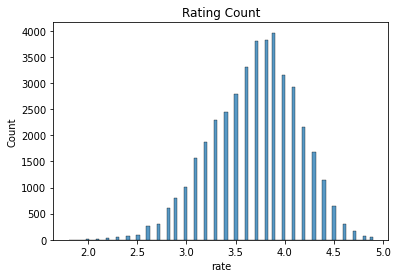

In [9]:
sns.histplot(df['rate'])
plt.title('Rating Count')

Text(0.5, 1.0, 'Rating Distribution')

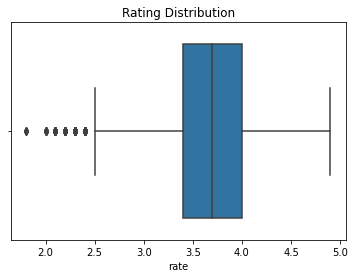

In [10]:
sns.boxplot(df['rate'])
plt.title('Rating Distribution')

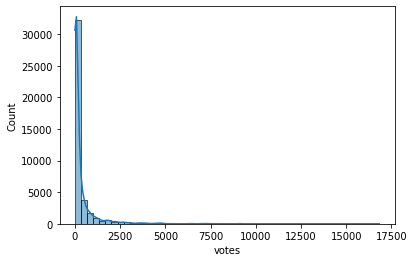

In [11]:
sns.histplot(df['votes'],bins=50,kde=True)

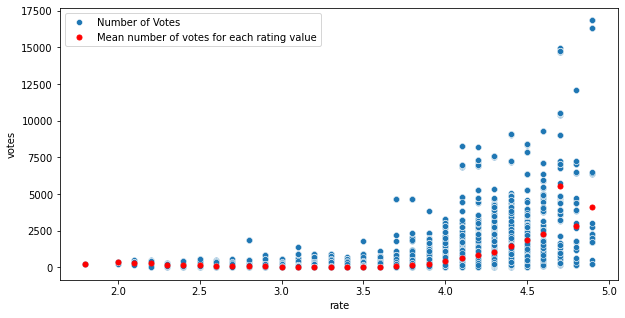

In [12]:
df_rate_votes=df[['rate','votes']]
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_rate_votes['rate'],y=df_rate_votes['votes'])
df_rate_votes=df_rate_votes.groupby('rate').mean()
plt.scatter(x=df_rate_votes.index,y=df_rate_votes['votes'],c='red',s=25)
plt.legend(labels=['Number of Votes','Mean number of votes for each rating value'])

Upto certain value of rating (3.5), the votes seems to have no effect on the ratings. However, above 3.5 rating, mean votes increases with ratings or vice-versa.

##Online Order and Book Table 

Text(0.5, 1.0, 'Online Order')

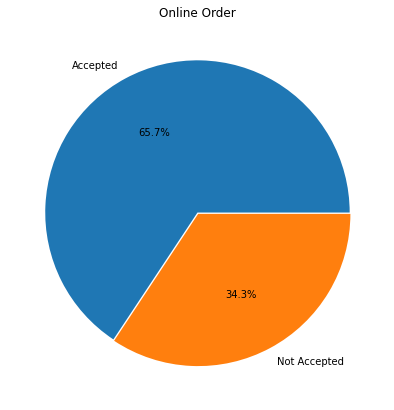

In [13]:
online=df['online_order'].value_counts()
labels=['Accepted','Not Accepted']
plt.figure(figsize=(7,7))
plt.pie(online,labels=labels,explode=[0.0,0.01],autopct='%1.1f%%')
plt.title('Online Order')

Majority Restaurant accepts online order, however, quite a significant percent(40.3%) does not accept online order.

Text(0.5, 1.0, 'Book Table')

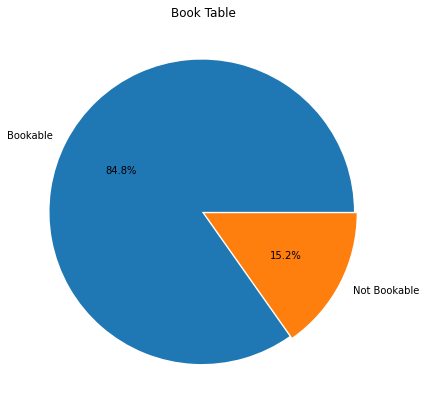

In [14]:
book_table=df['book_table'].value_counts()
labels=['Bookable','Not Bookable']
plt.figure(figsize=(7,7))
plt.pie(book_table,labels=labels,explode=[0.01,0.01],autopct='%.1f%%')
plt.title('Book Table')

We see most restaurants listed in Zomato are Book-able.

##Approx Cost For Two

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text major ticklabel objects>)

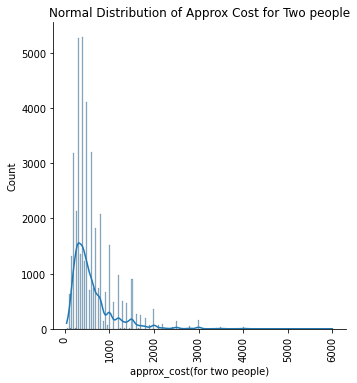

In [15]:
#Normal Distribution of Approx_cost(for two people)
sns.displot(df['approx_cost(for two people)'],kde=True)
plt.title('Normal Distribution of Approx Cost for Two people')
plt.xticks(rotation=90)

Restaurant seems to have approx_cost(for two people) from just above 0 to 6000.<br>
However, most Restaurants seems to have approx_cost(for two people) less than 1000, with the mean being less than 500.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

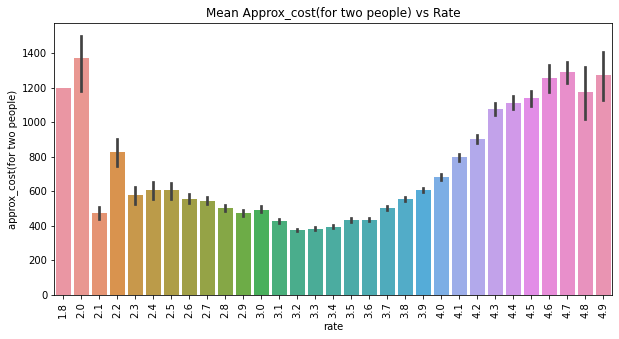

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['rate'],y=df['approx_cost(for two people)'])
plt.title('Mean Approx_cost(for two people) vs Rate')
plt.xticks(rotation=90)

**Observation**<br>
Although there is no clear cut trend visible for approx_cost for two people 
against rate upto the **rating value of 3.2**. However, above the rating value of 3.2, the approx_cost increases with increase in the rating. <br>The black line above each bar represents uncertainty. This uncertainty is low for the mid-rating values and high towards extreme.<br>
Thus we can conclude that *above a certain rating, higher cost restaurants seems to have higher ratings*.